In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [241]:
df = pd.read_csv('trainhs.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [252]:
def costfunction(x1,y1,theta,ld):
    x2=x1[:]
    m=len(x2[:,0])
    J = 0
    if (x2[:,0] != np.ones((m,1),int)).all():
        x2 = np.concatenate([np.ones((m,1),int),x2],axis=1)
    J = (1/(2*m))*sum((x2@theta - y1)**2) + (ld/(2*m))*sum(theta**2)
    #J = J - theta[0]**2
    return J[0]

In [243]:
def gradientdescent(x1,y,theta,ld,lr,maxiter):
    x=x1[:]
    m=len(x[:,0])
    if (x[:,0] != np.ones((m,1),int)).all():
        x = np.concatenate([np.ones((m,1),int),x],axis=1)
    jhist = []
    jind =[]
    i=0
    while i < maxiter:
        theta = theta*((m-(lr*ld))/m) - (lr/m)*(x.T@((x@theta-y)))
        jhist.append(costfunction(x,y,theta,ld))
        jind.append(i)
        i=i+1
    return theta,jhist,jind

In [244]:
def predict(x,theta):
    m=len(x[:,0])
    if (x[:,0] != np.ones((m,1),int)).all():
        x = np.concatenate([np.ones((m,1),int),x],axis=1)
    return x*theta

In [307]:
def normalise(x):
    n = len(x[0,:])
    i=0
    while i<n:
        x[:,i] = (x[:,i] - np.mean(x[:,i]))/(max(x[:,i])-min(x[:,i]))
        i=i+1

In [308]:
x = np.array(df[['LotFrontage','LotArea']])
y = np.array(df[['SalePrice']])
theta = np.ones((len(x[0,:])+1,1))
normalise(x[0:5])
normalise(y[0:5])
#x = np.concatenate([np.ones((1460,1),int),x],axis=1)

In [309]:
print(x)
print(theta)
print(y)

[[-2.66666667e-01 -3.73838210e-01]
 [ 3.58333333e-01 -1.75903614e-01]
 [-1.41666667e-01  1.08089501e-01]
 ...
 [ 6.60000000e+01  9.04200000e+03]
 [ 6.80000000e+01  9.71700000e+03]
 [ 7.50000000e+01  9.93700000e+03]]
[[1.]
 [1.]
 [1.]]
[[     0]
 [     0]
 [     0]
 ...
 [266500]
 [142125]
 [147500]]


In [321]:
lamb = 0
cf = costfunction(x[0:5],y[0:5],theta,lamb)
print(cf)

-0.2795219271479823


In [322]:
lr = 0.01
maxiter = 30
nth,jh,ji = gradientdescent(x[0:5],y[0:5],theta,lamb,lr,maxiter)

In [323]:
nth

array([[0.73970037],
       [0.93269077],
       [0.93917625]])

In [324]:
print(jh)

[-0.2705455844982215, -0.2617629448059723, -0.25317008678204944, -0.24476316746522142, -0.2365384206621831, -0.22849215541858003, -0.22062075452046426, -0.21292067302557494, -0.20538843682385688, -0.19802064122662644, -0.1908139495838186, -0.1837650919287599, -0.17687086364991234, -0.17012812418905632, -0.1635337957653865, -0.15708486212500183, -0.15077836731528682, -0.14461141448368864, -0.1385811647004036, -0.1326848358044973, -0.12691970127299257, -0.1212830891124681, -0.11577238077271879, -0.11038501008204171, -0.10511846220371218, -0.09997027261323288, -0.09493802609594176, -0.09001935576457032, -0.08521194209636063, -0.08051351198934587]


In [325]:
cf1 = costfunction(x[0:5],y[0:5],nth,lamb)
print(cf1)

-0.08051351198934587


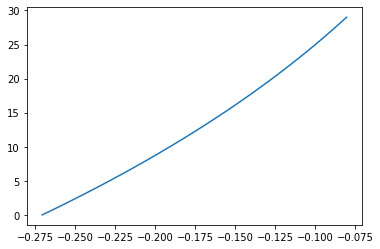

In [326]:
plt.plot(jh,ji)

In [231]:
theta

array([[nan],
       [nan],
       [nan]])

In [218]:
x[0:5]

array([[1.000e+00, 6.500e+01, 8.450e+03],
       [1.000e+00, 8.000e+01, 9.600e+03],
       [1.000e+00, 6.800e+01, 1.125e+04],
       [1.000e+00, 6.000e+01, 9.550e+03],
       [1.000e+00, 8.400e+01, 1.426e+04]])